Target Class: 'Survived'
Features to be investigated: 
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

Size of Cluster-1= 53
Size of Cluster-2= 838

Features names  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_X', 'Sex_female', 'Sex_male'],
      dtype='object')

Cluster Centre 1 [ 1.00000000e+00  3.17436903e+01  6.60377358e-01  8.86792453e-01
  1.87032858e+02  5.47169811e-01  2.77555756e-17  4.52830189e-01
 -8.67361738e-19  6.41509434e-01  3.58490566e-01]

Cluster Centre 2 [2.39140811e+00 2.95698070e+01 5.14319809e-01 3.49642005e-01
 2.24119425e+01 1.65871122e-01 9.18854415e-02 7.39856802e-01
 2.38663484e-03 3.34128878e-01 6.65871122e-01]
Tree rules=
 |--- Fare <= 98.75
|   |--- class: 1
|--- Fare >  98.75
|   |--- class: 0

train: Conf matrix Decision Tree
[[ 40   0]
 [  0 583]]

test: Conf matrix Decision Tree
[[ 13   0]
 [  0 255]]

              precision    recall  f1-score   support

           0    

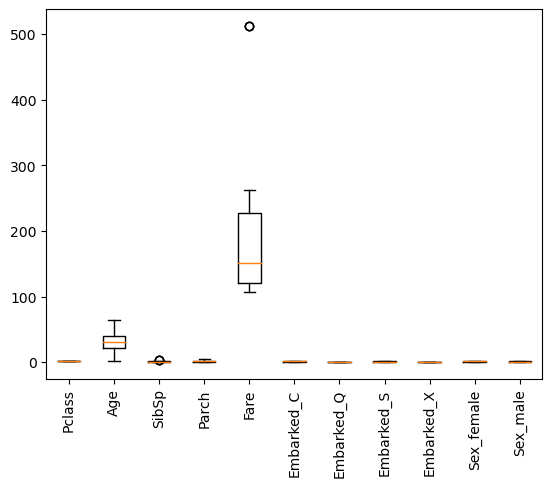

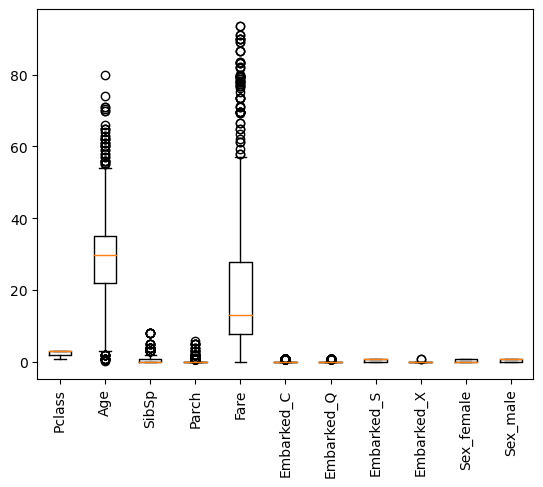

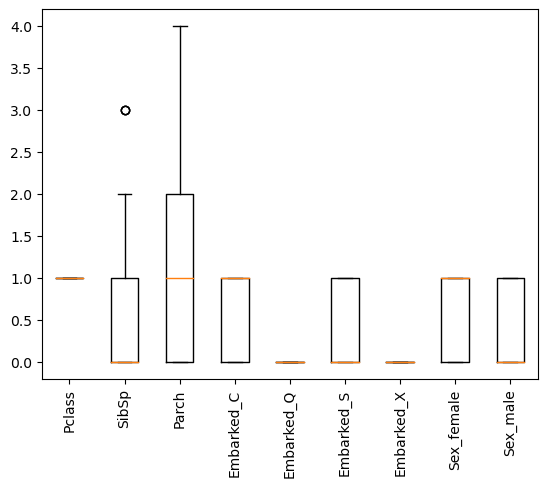

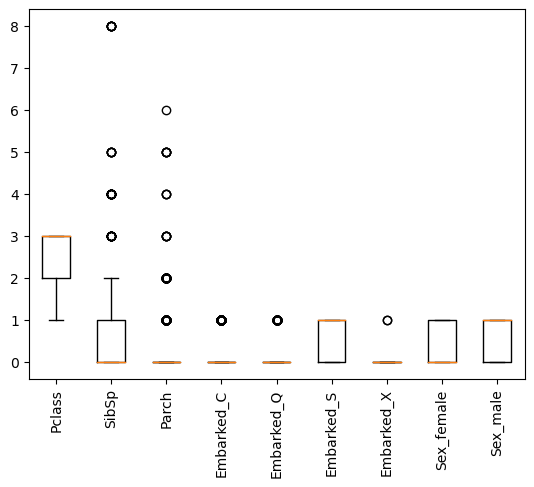

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
from sklearn import tree



def handle_categorical_na(df):
    ## replacing the null/na/nan values in 'Cabin' attribute with 'X'
#     df.Cabin = df.Cabin.fillna(value='X')
#     ## Stripping the string data in 'Cabin' and 'Ticket' features of numeric values and duplicated characters
#     df.Cabin = [''.join(set(filter(str.isalpha, s))) for s in df.Cabin]
#     df.Ticket = [''.join(set(filter(str.isalpha, s))) for s in df.Ticket]
#     ## replacing the '' values in 'Ticket' attribute with 'X'
#     df.Ticket.replace(to_replace='',value='X',inplace=True)
    ## Imputing the null/na/nan values in 'Age' attribute with its mean value 
    df.Age.fillna(value=df.Age.mean(),inplace=True)
    ## replacing the null/na/nan values in 'Embarked' attribute with 'X'
    df.Embarked.fillna(value='X',inplace=True)
    return df



data = pd.read_csv('train.csv')
data.head()
data.describe()

pd.DataFrame({'percent_missing': data.isnull().sum() * 100 / len(data)})


# Names of the features extacted from the data
selFeatures = list(data.columns.values)

# Removing the target variable from the column values
# we are doing clustering, so we do not need it
targetCol = 'Survived'
selFeatures.remove(targetCol)

# Removing features with unique values
for i in selFeatures:
    if data.shape[0] == len(pd.Series(data[i]).unique()) :
        selFeatures.remove(i)
        
# Removing features with high percentage of missing values
selFeatures.remove('Cabin')
        
# Also removing cabin and ticket features for the initial run.
selFeatures.remove('Ticket')
        

print("Target Class: '"+ targetCol + "'")
print('Features to be investigated: ')
print(selFeatures)


data=data[selFeatures]

data = handle_categorical_na(data)

## using One Hot Encoding for handling categorical data
data = pd.get_dummies(data,columns=['Embarked','Sex'],prefix=['Embarked','Sex'])

# Covert data to numpy arrays
X=np.array(data)

 

#cluster with two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.cluster_centers_



#    class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#    name - Name
#    sex - Sex
#    age - Age
#    sibsp - Number of Siblings/Spouses Aboard
#    parch - Number of Parents/Children Aboard
#    ticket - Ticket Number
#    fare - Passenger Fare
#    cabin - Cabin
#    embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
#    boat - Lifeboat (if survived)
#    body - Body number (if did not survive and body was recovered)



# Print cluster size
print('\nSize of Cluster-1=', len(kmeans.labels_[kmeans.labels_==0]))
print('Size of Cluster-2=', len(kmeans.labels_[kmeans.labels_==1]))


# 1st approch to characterization/ analysis of clusters
#  print cluster centres
print('\nFeatures names ',data.columns)
print('\nCluster Centre 1',kmeans.cluster_centers_[0])
print('\nCluster Centre 2',kmeans.cluster_centers_[1])



# 2nd approch to characterization/ analysis of clusters
#  Box plot for each feature for each cluster
idxCluster1=np.where(kmeans.labels_==0)
idxCluster2=np.where(kmeans.labels_==1)

#1st cluster
plt.figure(1)
plt.xticks(rotation=90)
plt.boxplot(X[idxCluster1],labels=list(data.columns))

#2nd cluster
plt.figure(2)
plt.xticks(rotation=90)
plt.boxplot(X[idxCluster2],labels=list(data.columns))

# 2nd: 2nd version approch to characterization/ analysis of clusters
# do not plot: age, and fare features
#  Box plot for each feature for each cluster appart from: Feature indexed 1, 4
idxCluster1=np.where(kmeans.labels_==0)
idxCluster2=np.where(kmeans.labels_==1)

#1st cluster
# do not plot: age, and fare features
plt.figure(3)
plt.xticks(rotation=90)
rows1=idxCluster1[0].tolist()
plt.boxplot(X[np.ix_(rows1,[0,2,3,5,6,7,8,9,10])],labels=['Pclass', 'SibSp', 'Parch',  'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_X', 'Sex_female', 'Sex_male'])

#2nd cluster
# do not plot: age, and fare features
plt.figure(4)
rows2=idxCluster2[0].tolist()
plt.xticks(rotation=90)
plt.boxplot(X[np.ix_(rows2,[0,2,3,5,6,7,8,9,10])] ,labels=['Pclass', 'SibSp', 'Parch',  'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_X', 'Sex_female', 'Sex_male'])




# 3rd approch to characterization/ analysis of clusters
#  train a DT for each cluster
perc=0.3

X_train, X_test, Y_train, Y_test = train_test_split(X, kmeans.labels_, test_size=perc)


clfDT =  tree.DecisionTreeClassifier()
#clfDT =  tree.DecisionTreeClassifier( max_depth=None, min_samples_leaf=20)
#clfDT= tree.DecisionTreeClassifier( max_depth=5)

clfDT.fit(X_train, Y_train)

print('Tree rules=\n',tree.export_text(clfDT, feature_names=list(data.columns)))


#test the trained model on the training set
Y_train_pred_DT=clfDT.predict(X_train)
#test the trained model on the test set
Y_test_pred_DT=clfDT.predict(X_test)


confMatrixTrainDT=confusion_matrix(Y_train, Y_train_pred_DT, labels=None)
confMatrixTestDT=confusion_matrix(Y_test, Y_test_pred_DT, labels=None)


print ('train: Conf matrix Decision Tree')
print (confMatrixTrainDT)
print ()

print ('test: Conf matrix Decision Tree')
print (confMatrixTestDT)
print ()


pr_y_test_pred_DT=clfDT.predict_proba(X_test)

#ROC curve for the class encoded by 0, survived
fprDT, tprDT, thresholdsDT = roc_curve(Y_test, pr_y_test_pred_DT[:,1])


print(classification_report(Y_test, Y_test_pred_DT))
